In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, NeighbourhoodCleaningRule

from google.colab import files
uploaded = files.upload()

Saving heart_attack_normalized.csv to heart_attack_normalized (1).csv


In [6]:
# Load datasets
df = pd.read_csv("heart_attack_normalized.csv")

Neural Network

Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


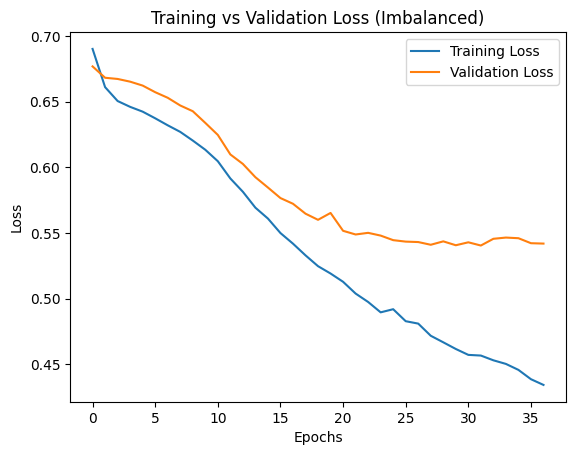

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- Metrics: Imbalanced ---
Accuracy: 0.7765151515151515
Precision: 0.8198757763975155
Recall: 0.8148148148148148
F1-score: 0.8173374613003096
Balanced Accuracy: 0.7652505446623094

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       102
           1       0.82      0.81      0.82       162

    accuracy                           0.78       264
   macro avg       0.76      0.77      0.76       264
weighted avg       0.78      0.78      0.78       264



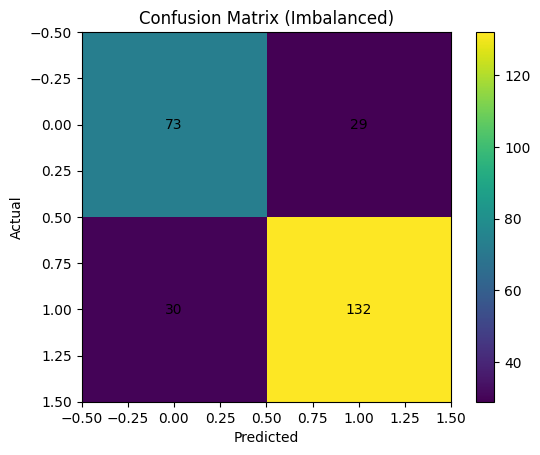

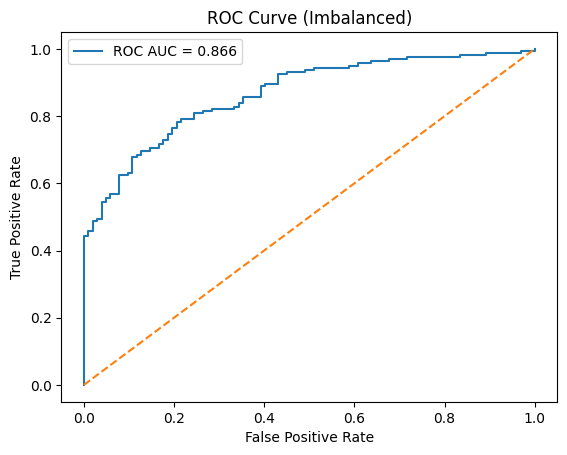

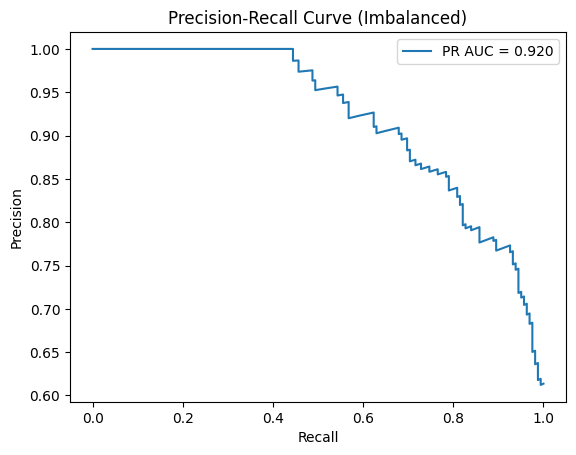


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


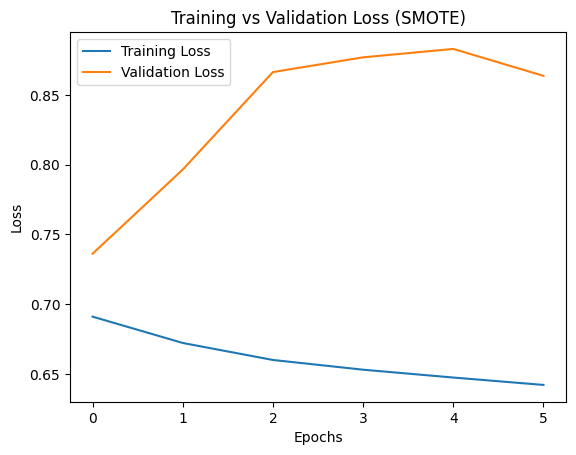

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

--- Metrics: SMOTE ---
Accuracy: 0.5984848484848485
Precision: 0.609375
Recall: 0.9629629629629629
F1-score: 0.7464114832535885
Balanced Accuracy: 0.4912854030501089

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.25      0.02      0.04       102
           1       0.61      0.96      0.75       162

    accuracy                           0.60       264
   macro avg       0.43      0.49      0.39       264
weighted avg       0.47      0.60      0.47       264



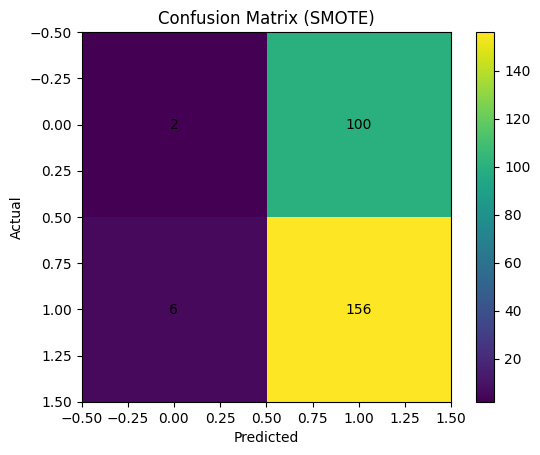

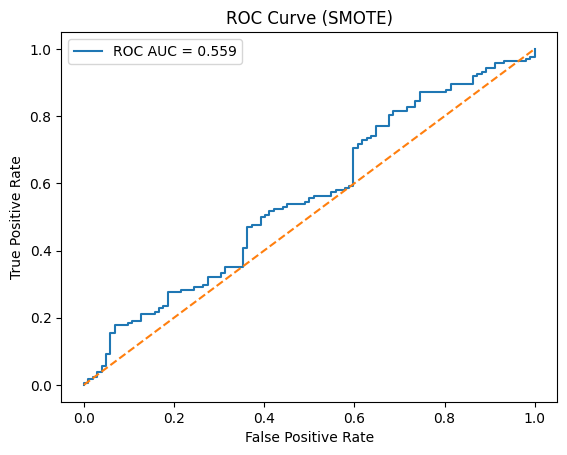

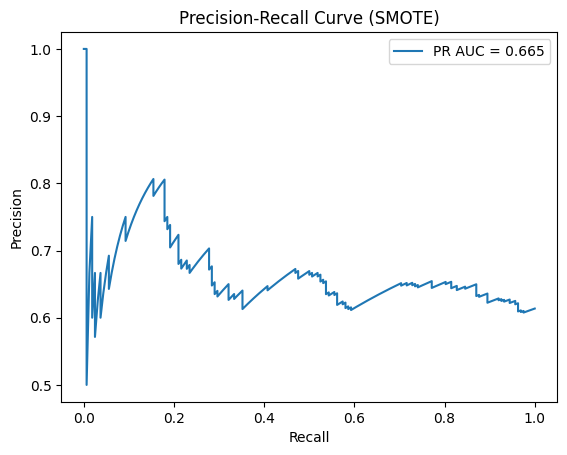


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


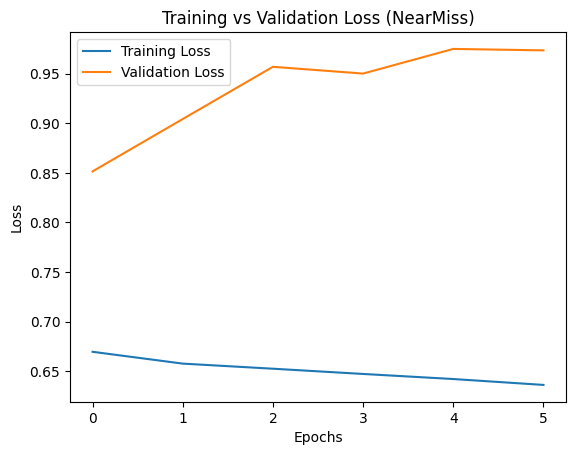

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- Metrics: NearMiss ---
Accuracy: 0.38636363636363635
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Balanced Accuracy: 0.5

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       102
           1       0.00      0.00      0.00       162

    accuracy                           0.39       264
   macro avg       0.19      0.50      0.28       264
weighted avg       0.15      0.39      0.22       264



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

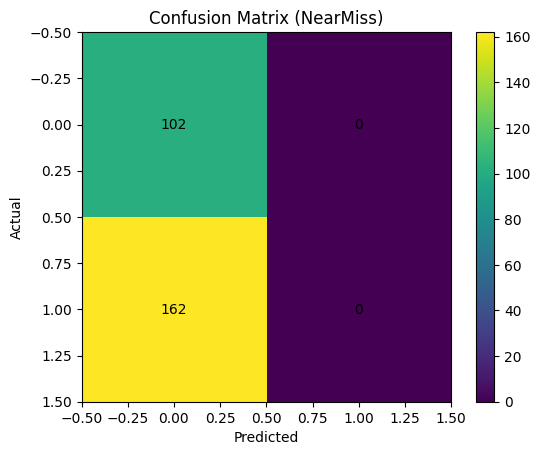

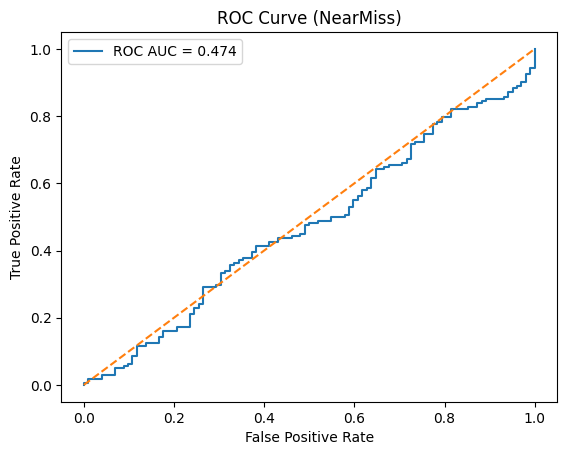

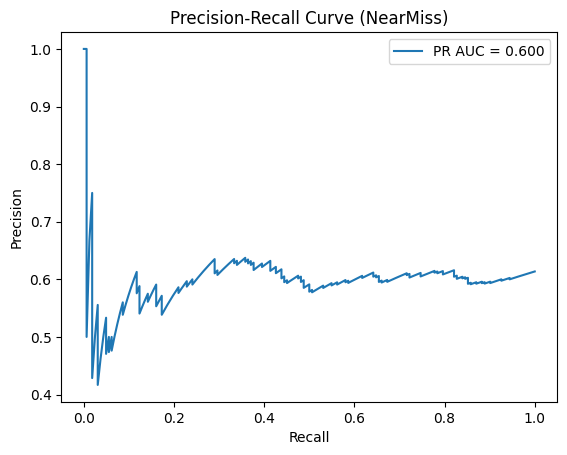


--- Summary Table: Neural Network Experiments ---


,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.776515,0.819876,0.814815,0.817337,0.765251,0.865529,0.920499
SMOTE,0.598485,0.609375,0.962963,0.746411,0.491285,0.558884,0.664694
NearMiss,0.386364,0.000000,0.000000,0.000000,0.500000,0.474340,0.600297


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- HELPER FUNCTIONS ----------------
def build_nn(input_dim):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test, title=""):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Loss curves
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss ({title})')
    plt.legend()
    plt.show()

    # Predictions
    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
nn_model_imbalanced = build_nn(X_train.shape[1])
metrics_imbalanced = evaluate_model(nn_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
nn_model_smote = build_nn(X_train_sm.shape[1])
metrics_smote = evaluate_model(nn_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
nn_model_nm = build_nn(X_train_nm.shape[1])
metrics_nm = evaluate_model(nn_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: Neural Network Experiments ---")
summary_df


Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


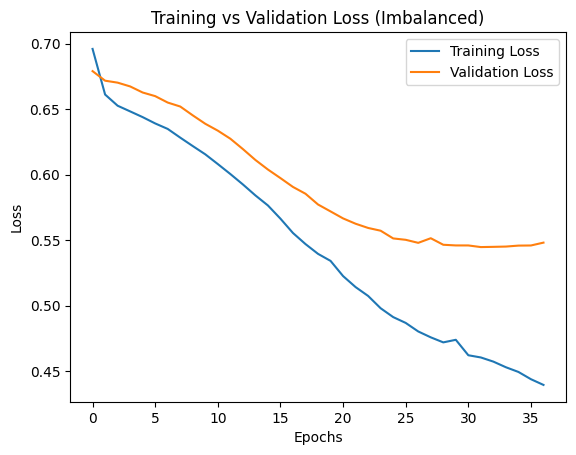


Test Loss (Imbalanced): 0.4617, Test Accuracy: 0.7765
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

--- Metrics: Imbalanced ---
Accuracy: 0.7765151515151515
Precision: 0.8121212121212121
Recall: 0.8271604938271605
F1-score: 0.8195718654434251
Balanced Accuracy: 0.7616194625998547

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       102
           1       0.81      0.83      0.82       162

    accuracy                           0.78       264
   macro avg       0.76      0.76      0.76       264
weighted avg       0.78      0.78      0.78       264



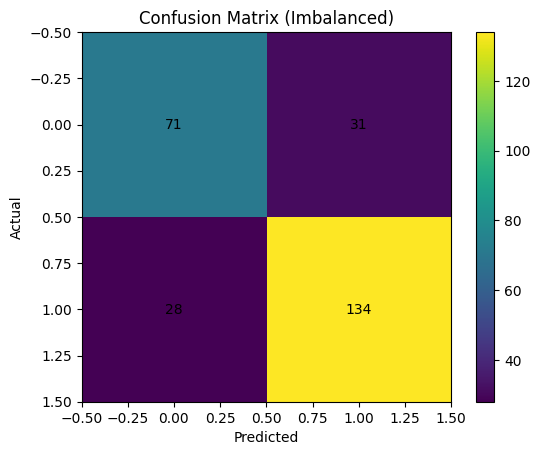

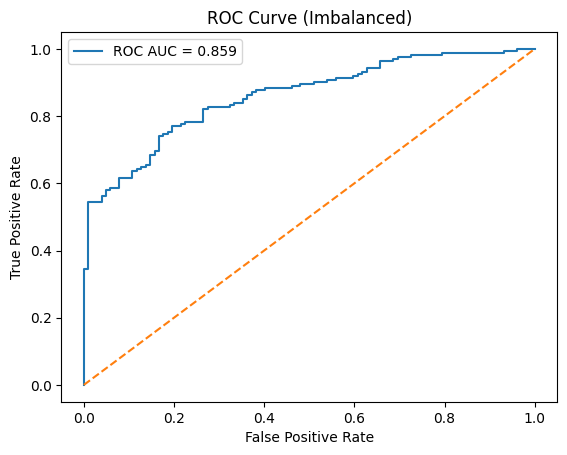

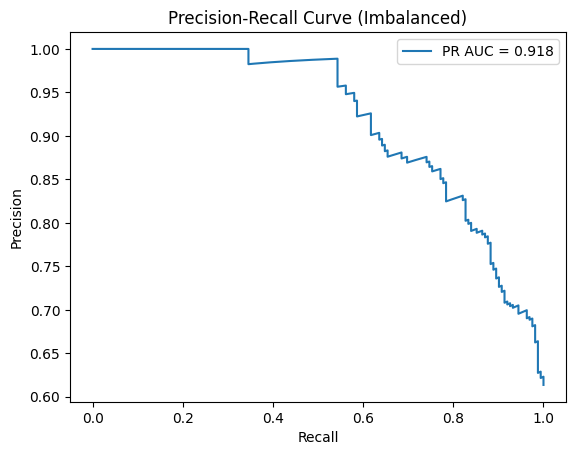


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


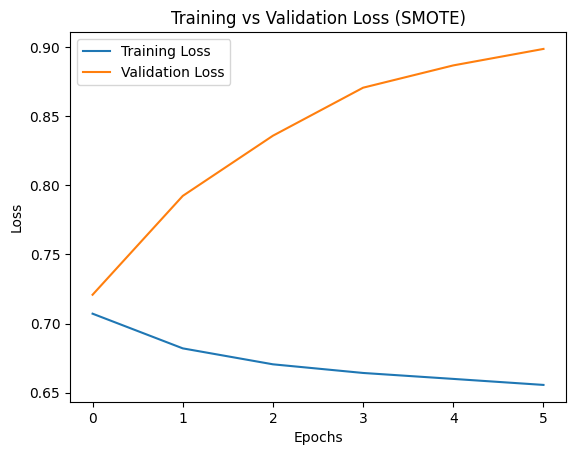


Test Loss (SMOTE): 0.6900, Test Accuracy: 0.4848
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- Metrics: SMOTE ---
Accuracy: 0.48484848484848486
Precision: 0.5822784810126582
Recall: 0.5679012345679012
F1-score: 0.575
Balanced Accuracy: 0.4604212055192447

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.34      0.35      0.35       102
           1       0.58      0.57      0.57       162

    accuracy                           0.48       264
   macro avg       0.46      0.46      0.46       264
weighted avg       0.49      0.48      0.49       264



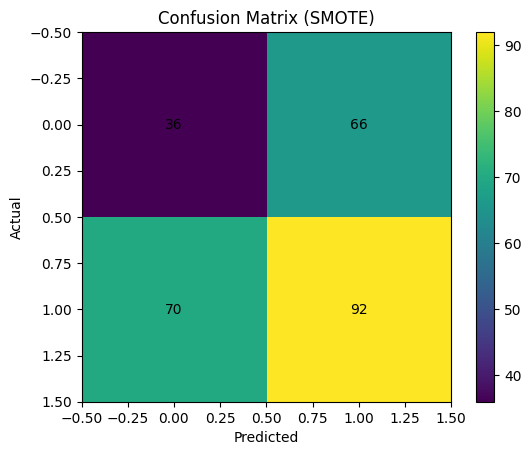

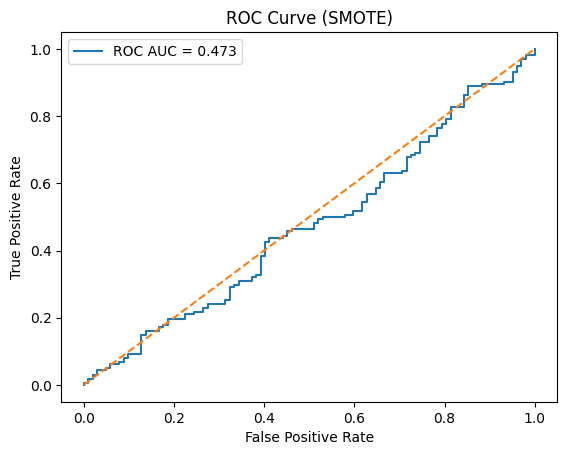

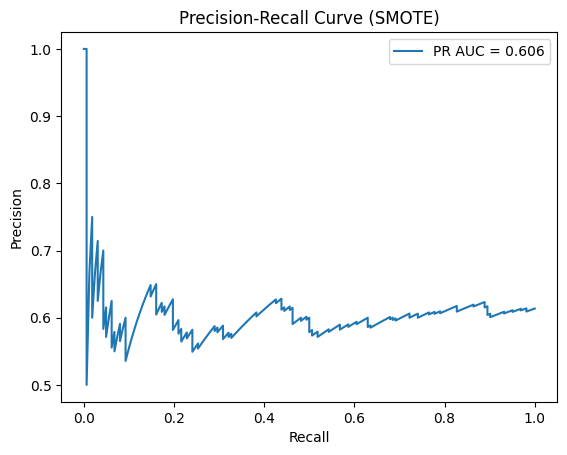


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


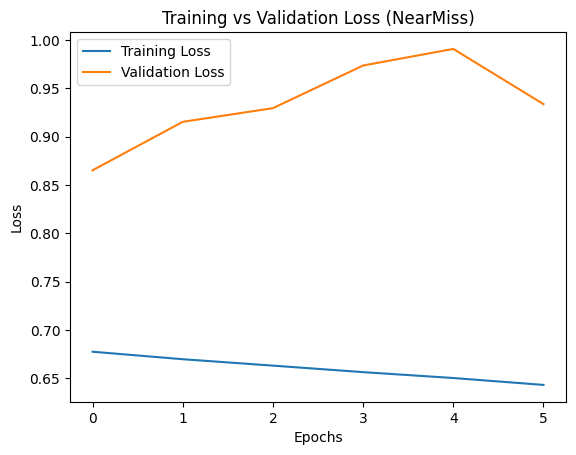


Test Loss (NearMiss): 0.7504, Test Accuracy: 0.3864
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- Metrics: NearMiss ---
Accuracy: 0.38636363636363635
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Balanced Accuracy: 0.5

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       102
           1       0.00      0.00      0.00       162

    accuracy                           0.39       264
   macro avg       0.19      0.50      0.28       264
weighted avg       0.15      0.39      0.22       264



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

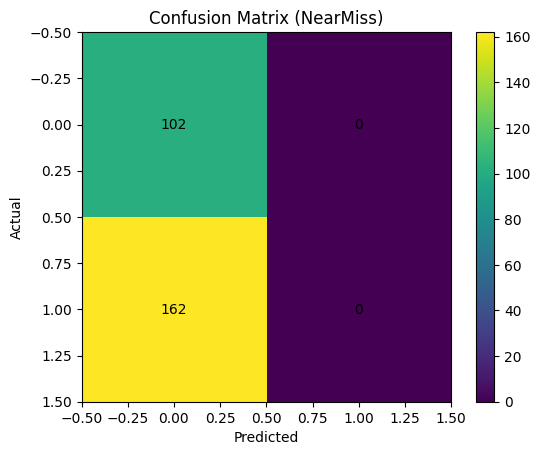

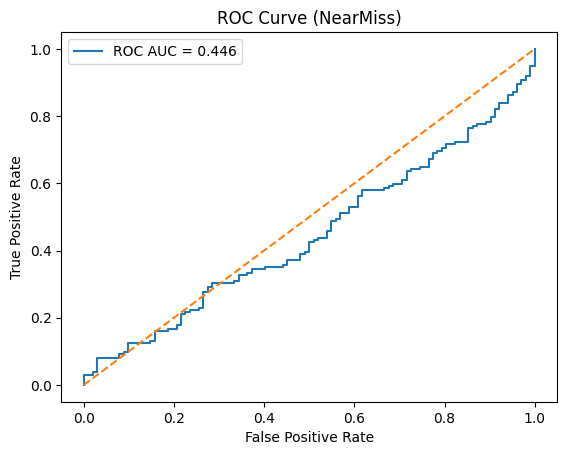

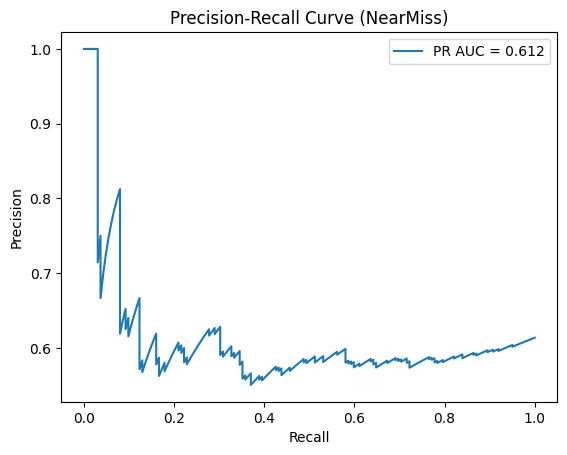


--- Summary Table: Neural Network Experiments ---


,Test Loss,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.461741,0.776515,0.812121,0.827160,0.819572,0.761619,0.858993,0.917926
SMOTE,0.690028,0.484848,0.582278,0.567901,0.575000,0.460421,0.473312,0.606192
NearMiss,0.750379,0.386364,0.000000,0.000000,0.000000,0.500000,0.445836,0.612445


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- HELPER FUNCTIONS ----------------
def build_nn(input_dim):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_dim,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test, title=""):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Training vs Validation Loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss ({title})')
    plt.legend()
    plt.show()

    # Test loss
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss ({title}): {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    # Predictions
    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    return {
        "Test Loss": test_loss,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
nn_model_imbalanced = build_nn(X_train.shape[1])
metrics_imbalanced = evaluate_model(nn_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
nn_model_smote = build_nn(X_train_sm.shape[1])
metrics_smote = evaluate_model(nn_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
nn_model_nm = build_nn(X_train_nm.shape[1])
metrics_nm = evaluate_model(nn_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: Neural Network Experiments ---")
summary_df


SVM

Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64

--- Metrics: Imbalanced ---
Test Loss (log loss): 0.5056413225693085
Accuracy: 0.7424242424242424
Precision: 0.7865853658536586
Recall: 0.7962962962962963
F1-score: 0.7914110429447853
Balanced Accuracy: 0.7265795206971677

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       102
           1       0.79      0.80      0.79       162

    accuracy                           0.74       264
   macro avg       0.73      0.73      0.73       264
weighted avg       0.74      0.74      0.74       264



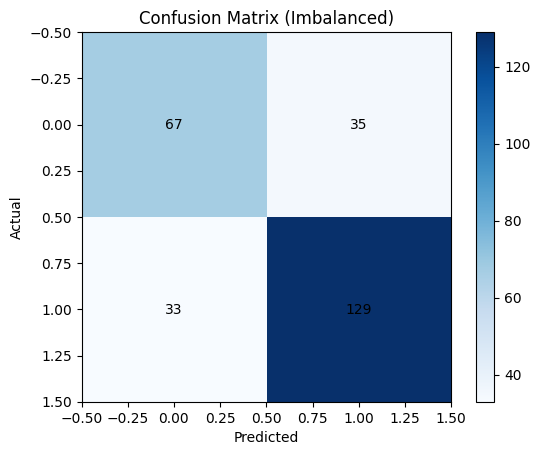

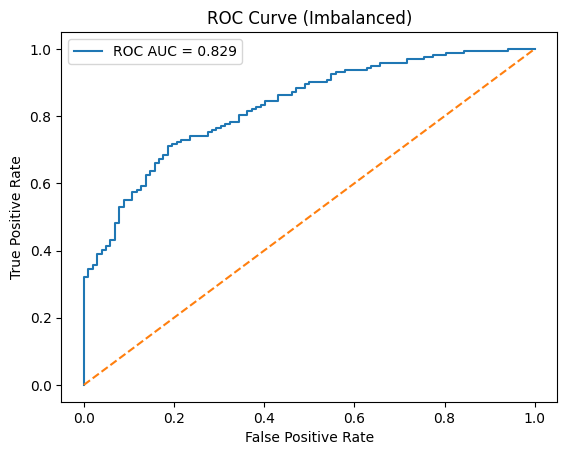

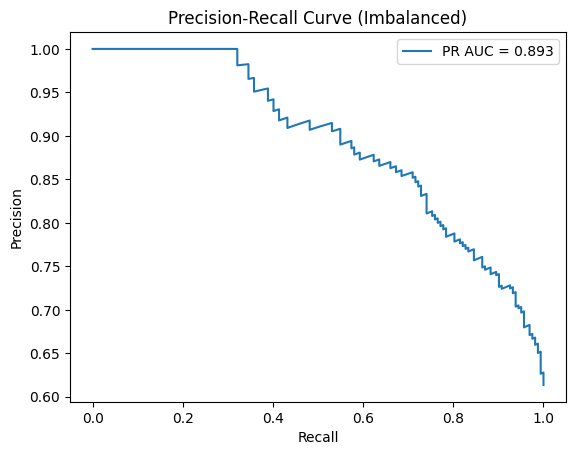

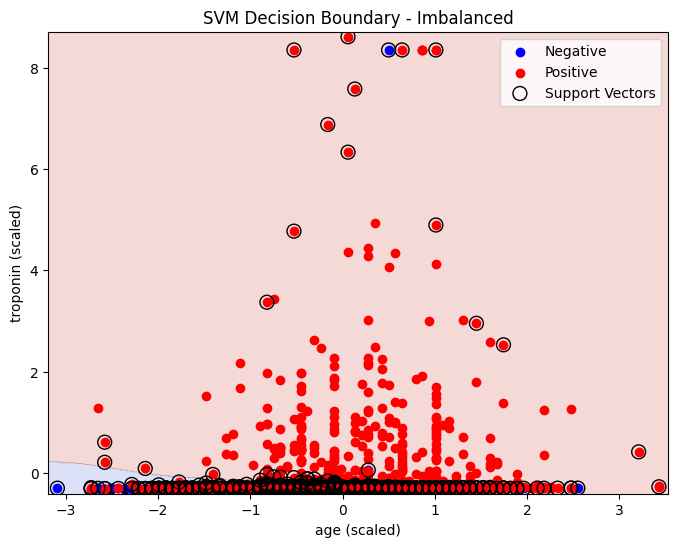


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64

--- Metrics: SMOTE ---
Test Loss (log loss): 0.5104825714866722
Accuracy: 0.7272727272727273
Precision: 0.8688524590163934
Recall: 0.654320987654321
F1-score: 0.7464788732394366
Balanced Accuracy: 0.7487291212781408

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.61      0.84      0.70       102
           1       0.87      0.65      0.75       162

    accuracy                           0.73       264
   macro avg       0.74      0.75      0.73       264
weighted avg       0.77      0.73      0.73       264



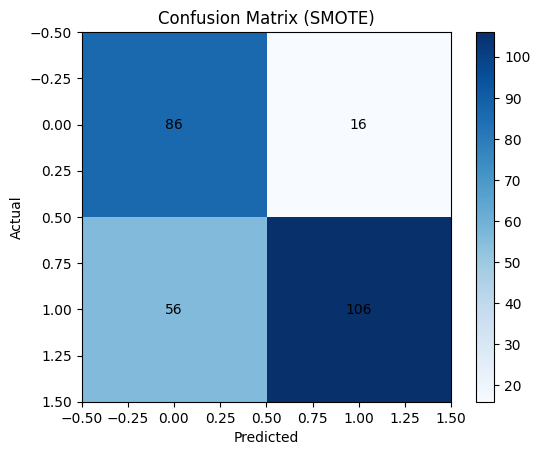

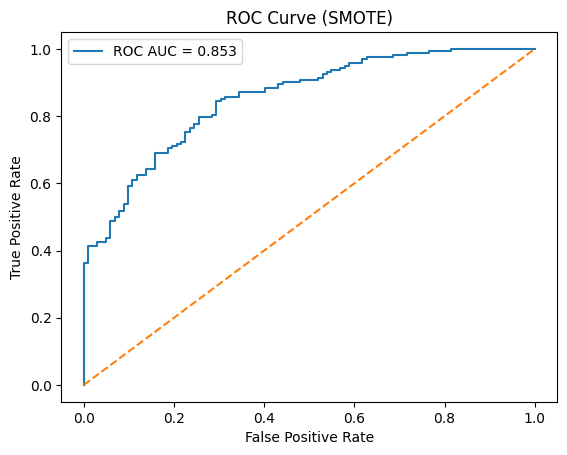

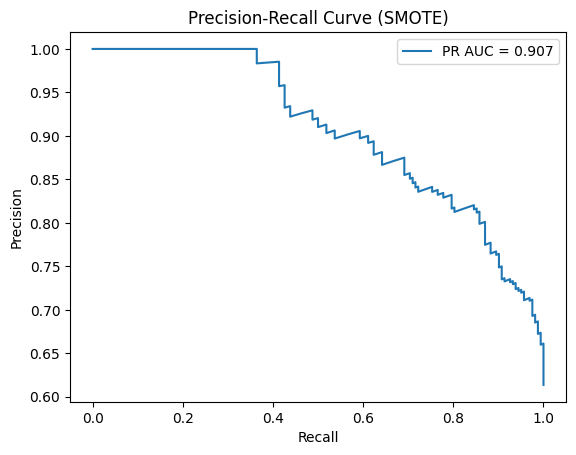

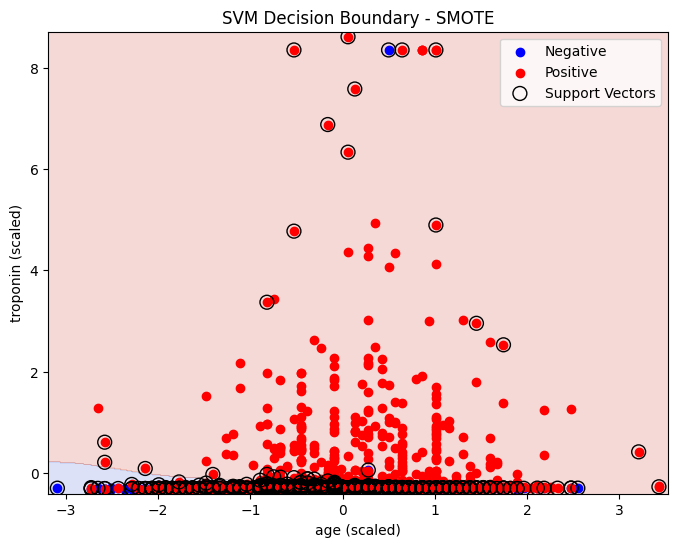


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64

--- Metrics: NearMiss ---
Test Loss (log loss): 0.581819000598599
Accuracy: 0.6856060606060606
Precision: 0.7925925925925926
Recall: 0.6604938271604939
F1-score: 0.7205387205387206
Balanced Accuracy: 0.6929920116194626

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       102
           1       0.79      0.66      0.72       162

    accuracy                           0.69       264
   macro avg       0.68      0.69      0.68       264
weighted avg       0.71      0.69      0.69       264



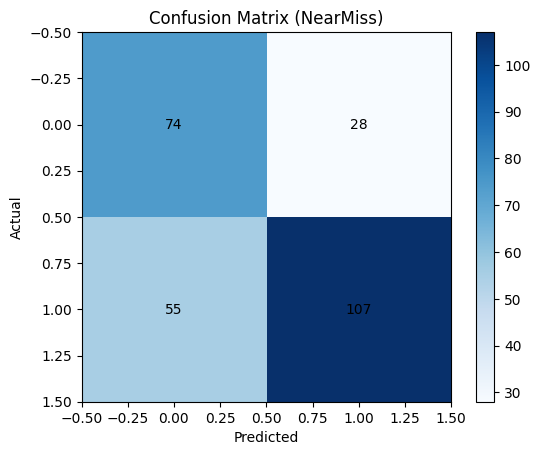

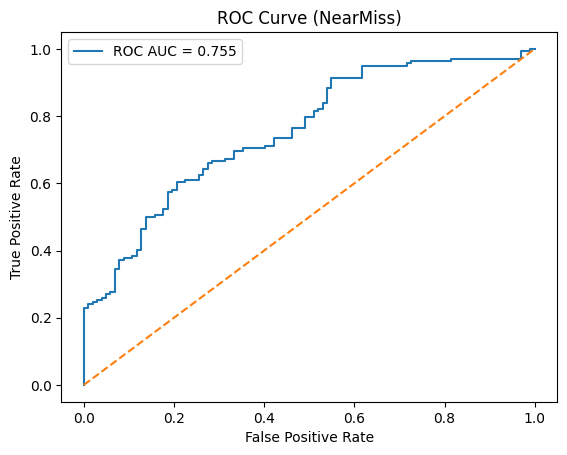

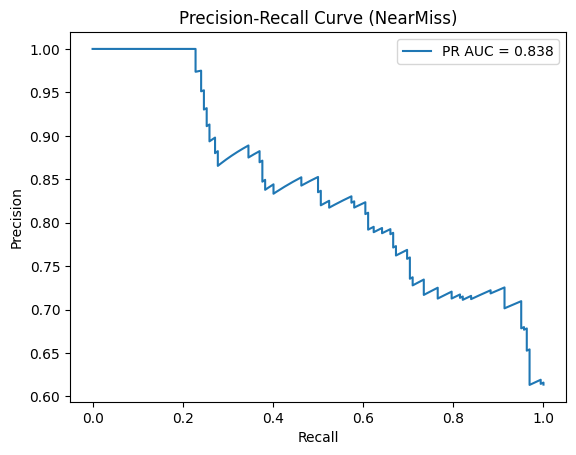

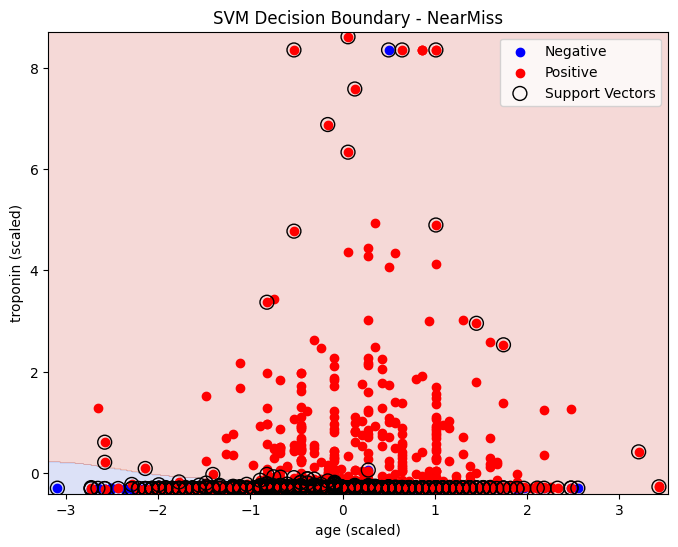


--- Summary Table: SVM Experiments ---


,Test Loss,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.505641,0.742424,0.786585,0.796296,0.791411,0.726580,0.829037,0.892771
SMOTE,0.510483,0.727273,0.868852,0.654321,0.746479,0.748729,0.853244,0.906918
NearMiss,0.581819,0.685606,0.792593,0.660494,0.720539,0.692992,0.755265,0.838167


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    log_loss
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- SCALE FEATURES ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- HELPER FUNCTION ----------------
def evaluate_svm(model, X_train, y_train, X_test, y_test, title=""):
    # Train SVM
    model.fit(X_train, y_train)
    y_prob = model.decision_function(X_test)
    y_pred = model.predict(X_test)

    # Convert decision function to probability-like values for log_loss
    y_prob_sigmoid = 1 / (1 + np.exp(-y_prob))

    # Test loss
    test_loss = log_loss(y_test, y_prob_sigmoid)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Test Loss (log loss):", test_loss)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    return {
        "Test Loss": test_loss,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- DECISION BOUNDARY FUNCTION ----------------
def plot_decision_boundary(model, X_scaled, y, feature_indices=[0,7], title="Decision Boundary"):
    # Select two features
    X_plot = X_scaled[:, feature_indices]
    y_plot = y.values if isinstance(y, pd.Series) else y

    # Train SVM only on two features
    svm_vis = SVC(kernel='rbf', C=1.0, random_state=42)
    svm_vis.fit(X_plot, y_plot)

    # Create mesh grid
    x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
    y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict for grid
    Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    # Points
    plt.scatter(X_plot[y_plot==0, 0], X_plot[y_plot==0, 1], color='blue', label='Negative')
    plt.scatter(X_plot[y_plot==1, 0], X_plot[y_plot==1, 1], color='red', label='Positive')

    # Support vectors
    plt.scatter(svm_vis.support_vectors_[:, 0], svm_vis.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.xlabel('age (scaled)')
    plt.ylabel('troponin (scaled)')
    plt.title(title)
    plt.legend()
    plt.show()

# ---------------- TRAIN/TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
svm_model_imbalanced = SVC(kernel='rbf', C=1.0, probability=False, random_state=42)
metrics_imbalanced = evaluate_svm(svm_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")
plot_decision_boundary(svm_model_imbalanced, X_scaled, y, title="SVM Decision Boundary - Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
svm_model_smote = SVC(kernel='rbf', C=1.0, probability=False, random_state=42)
metrics_smote = evaluate_svm(svm_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")
plot_decision_boundary(svm_model_smote, X_scaled, y, title="SVM Decision Boundary - SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
svm_model_nm = SVC(kernel='rbf', C=1.0, probability=False, random_state=42)
metrics_nm = evaluate_svm(svm_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")
plot_decision_boundary(svm_model_nm, X_scaled, y, title="SVM Decision Boundary - NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: SVM Experiments ---")
summary_df


Decision Tree

Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64

--- Metrics: Imbalanced ---
Test Loss (log loss): 0.6826449505514613
Accuracy: 0.9810606060606061
Precision: 0.9815950920245399
Recall: 0.9876543209876543
F1-score: 0.9846153846153847
Balanced Accuracy: 0.979121278140886

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.98      0.99      0.98       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



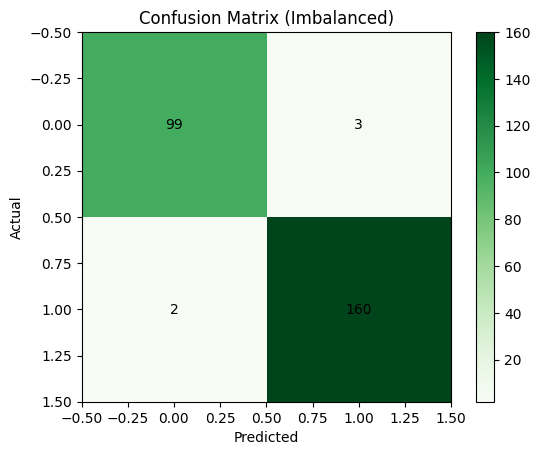

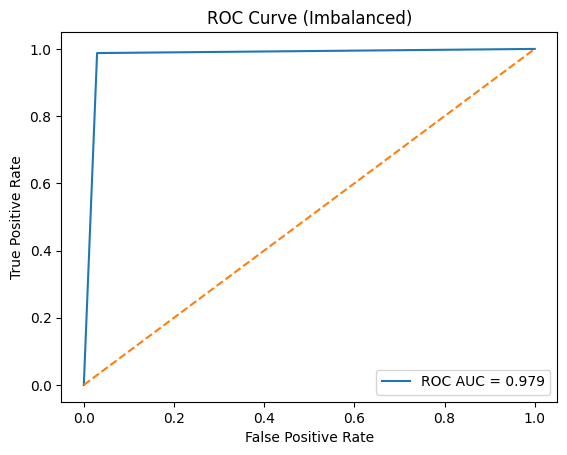

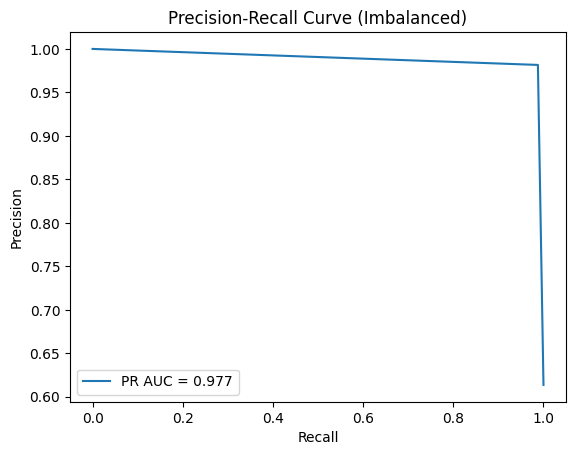

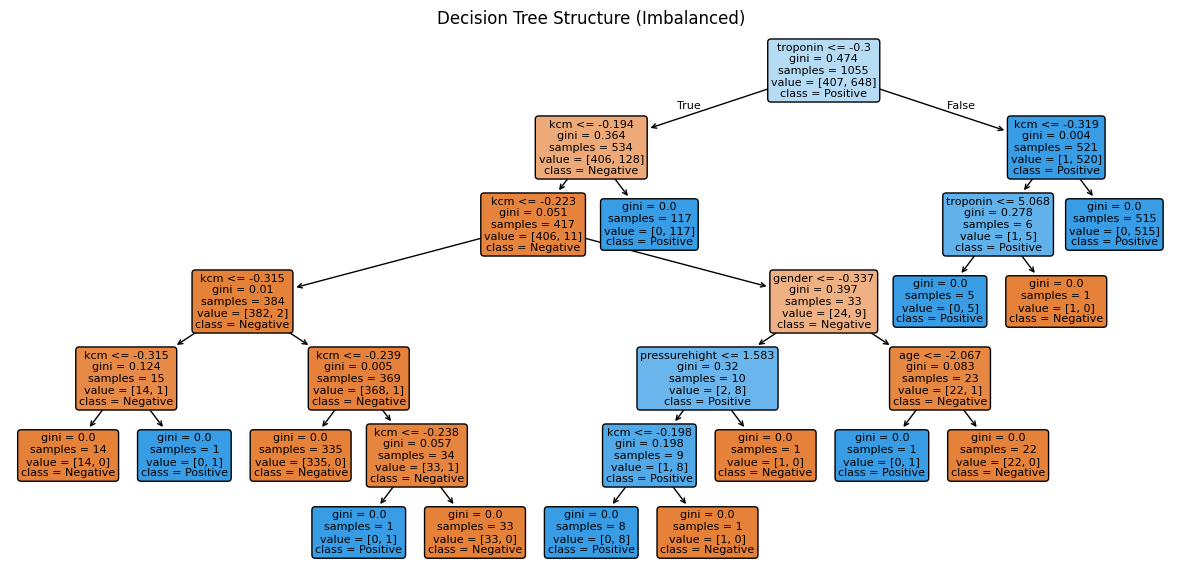


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64

--- Metrics: SMOTE ---
Test Loss (log loss): 0.6826449505514613
Accuracy: 0.9810606060606061
Precision: 0.9815950920245399
Recall: 0.9876543209876543
F1-score: 0.9846153846153847
Balanced Accuracy: 0.979121278140886

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.98      0.99      0.98       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



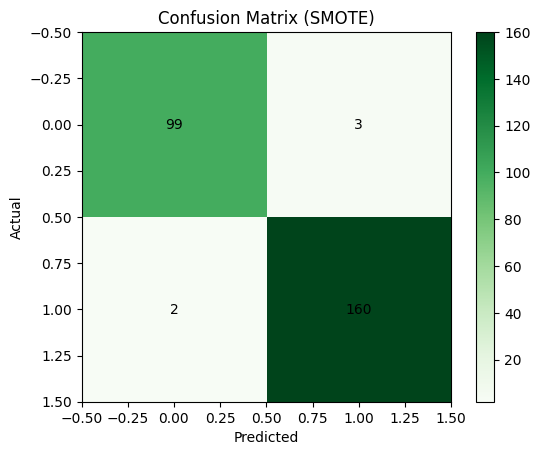

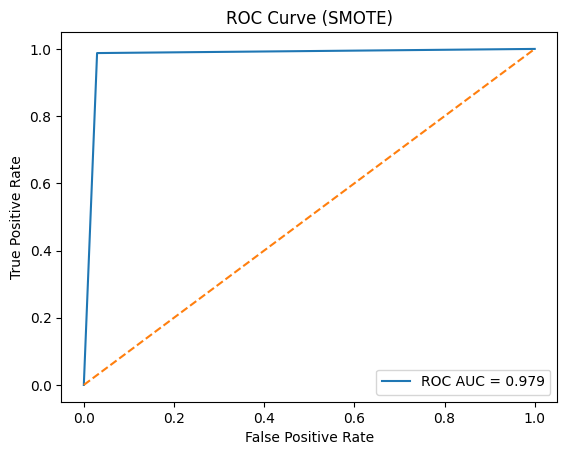

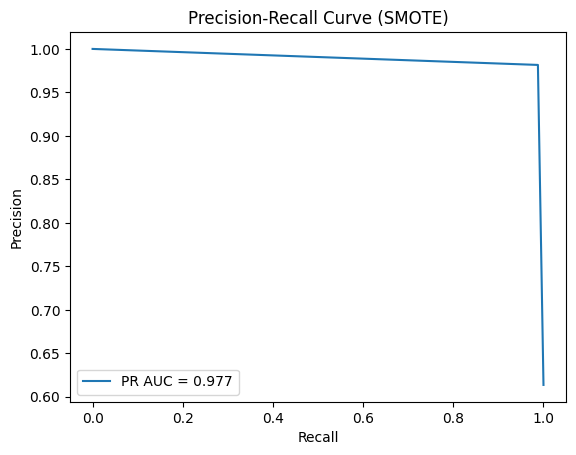

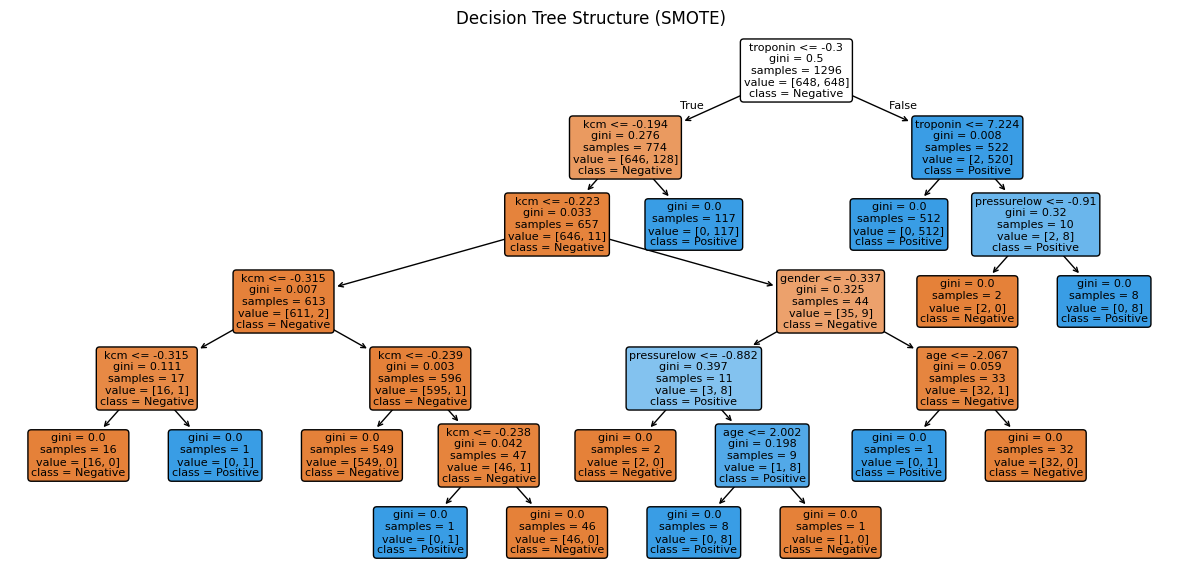


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64

--- Metrics: NearMiss ---
Test Loss (log loss): 0.8191739406617538
Accuracy: 0.9772727272727273
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1-score: 0.9814814814814815
Balanced Accuracy: 0.9760348583877996

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.98      0.98      0.98       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



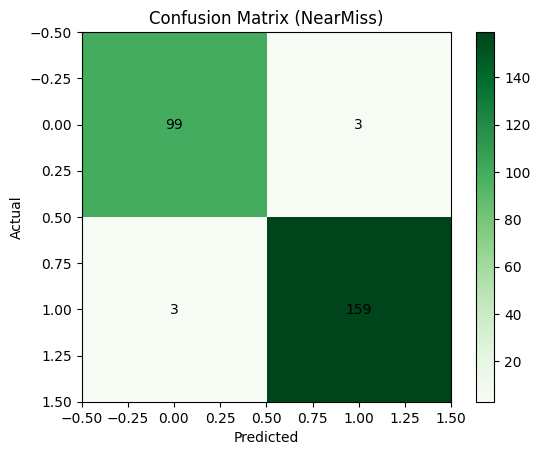

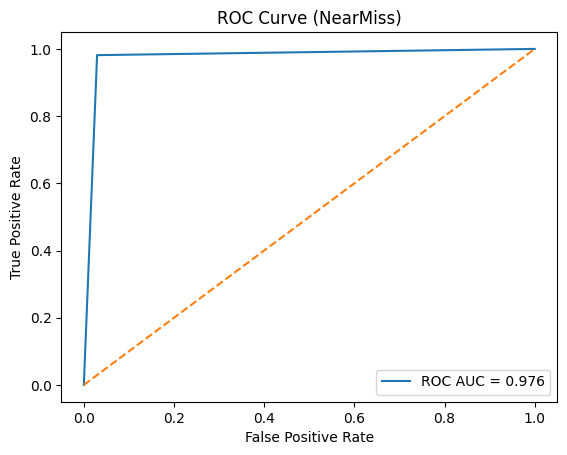

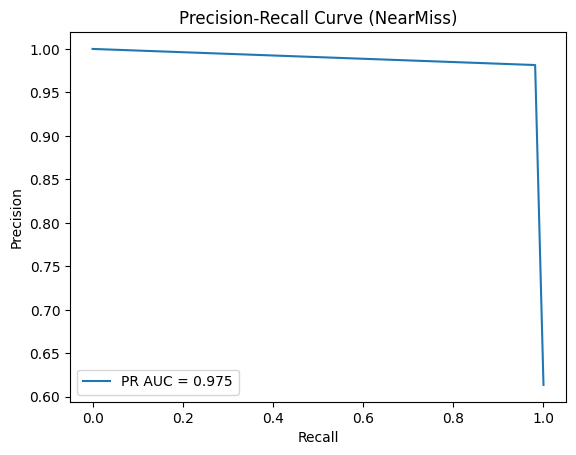

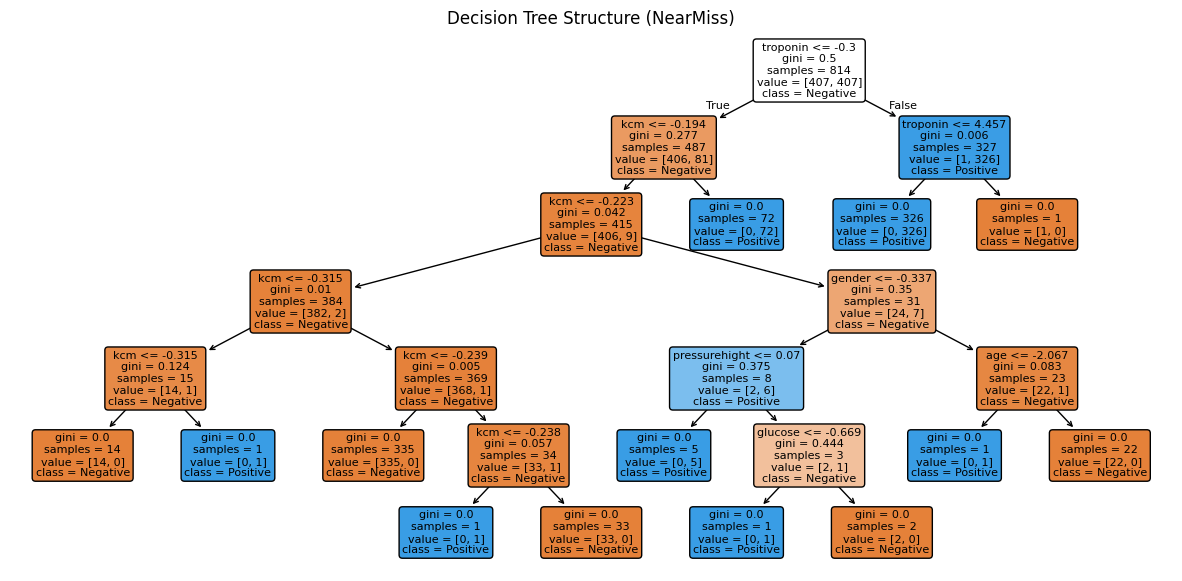


--- Summary Table: Decision Tree Experiments ---


,Test Loss,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.682645,0.981061,0.981595,0.987654,0.984615,0.979121,0.979121,0.977052
SMOTE,0.682645,0.981061,0.981595,0.987654,0.984615,0.979121,0.979121,0.977052
NearMiss,0.819174,0.977273,0.981481,0.981481,0.981481,0.976035,0.976035,0.974670


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    log_loss
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- SCALE FEATURES ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- HELPER FUNCTION ----------------
def evaluate_tree(model, X_train, y_train, X_test, y_test, title=""):
    # Train
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]  # probability for positive class
    y_pred = model.predict(X_test)

    # Test loss
    test_loss = log_loss(y_test, y_prob)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Test Loss (log loss):", test_loss)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap='Greens')
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    # Optional: plot tree
    plt.figure(figsize=(15,7))
    plot_tree(model, feature_names=X.columns, class_names=['Negative','Positive'],
              filled=True, rounded=True, fontsize=8)
    plt.title(f"Decision Tree Structure ({title})")
    plt.show()

    return {
        "Test Loss": test_loss,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- TRAIN/TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
dt_model_imbalanced = DecisionTreeClassifier(random_state=42)
metrics_imbalanced = evaluate_tree(dt_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
dt_model_smote = DecisionTreeClassifier(random_state=42)
metrics_smote = evaluate_tree(dt_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
dt_model_nm = DecisionTreeClassifier(random_state=42)
metrics_nm = evaluate_tree(dt_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: Decision Tree Experiments ---")
summary_df


Random Forest

Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64

--- Metrics: Imbalanced ---
Test Loss (log loss): 0.09272185603344396
Accuracy: 0.9848484848484849
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1-score: 0.9876543209876543
Balanced Accuracy: 0.9840232389251997

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



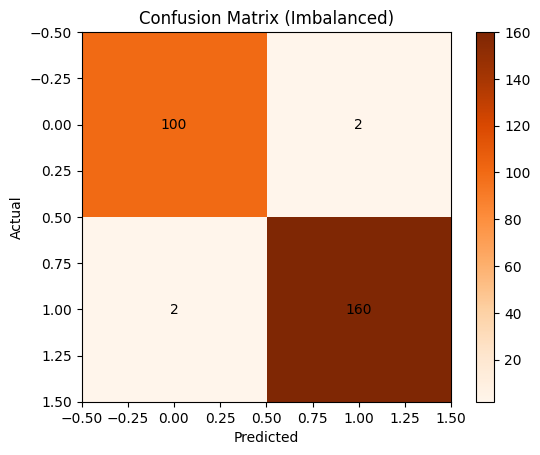

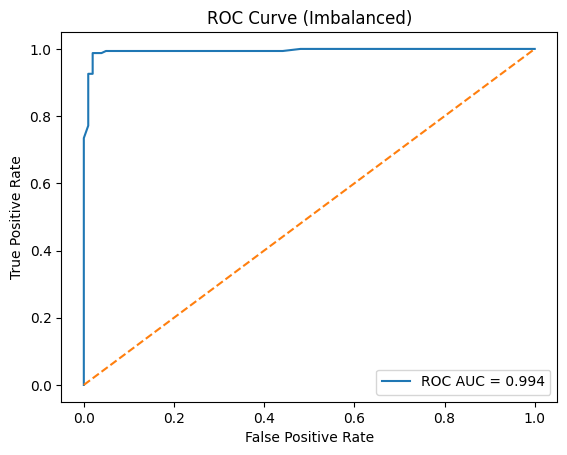

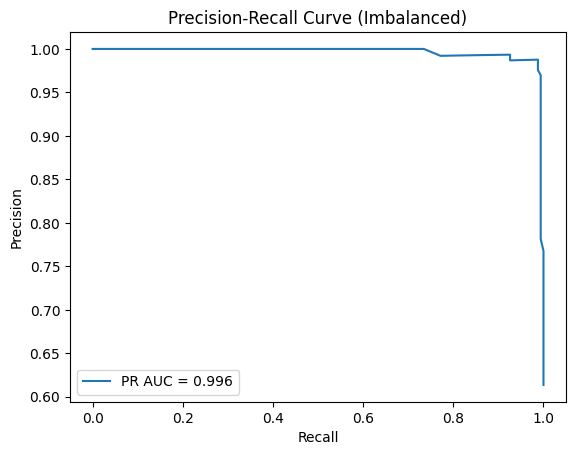

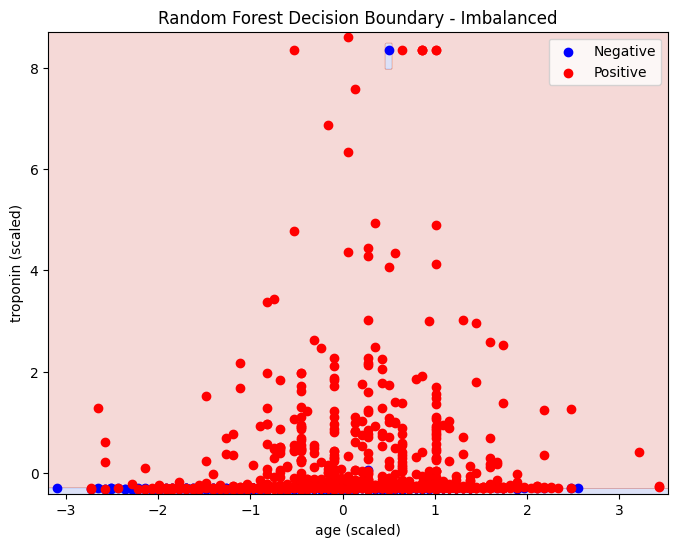


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64

--- Metrics: SMOTE ---
Test Loss (log loss): 0.08658530681516818
Accuracy: 0.9848484848484849
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1-score: 0.9876543209876543
Balanced Accuracy: 0.9840232389251997

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



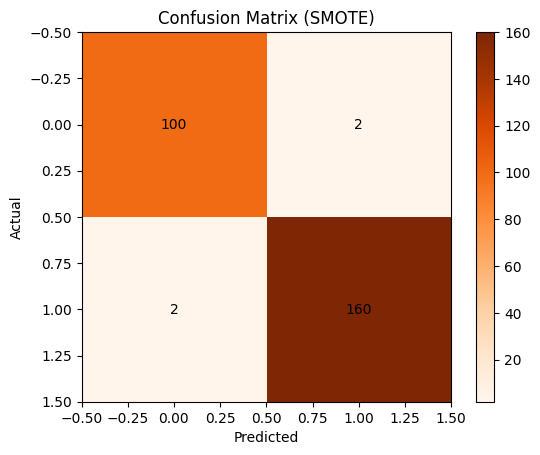

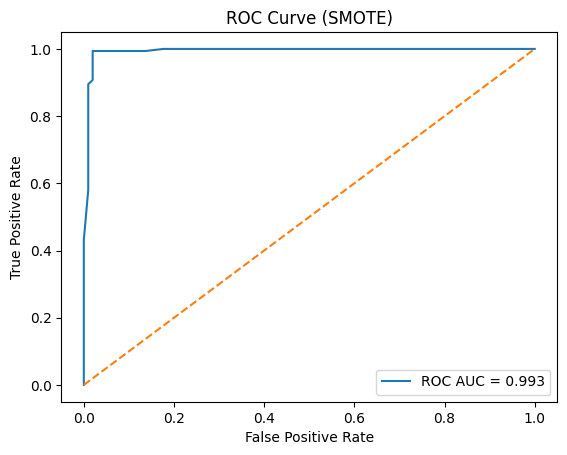

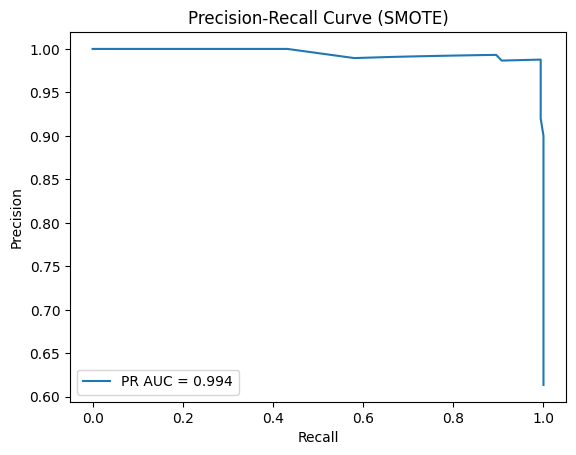

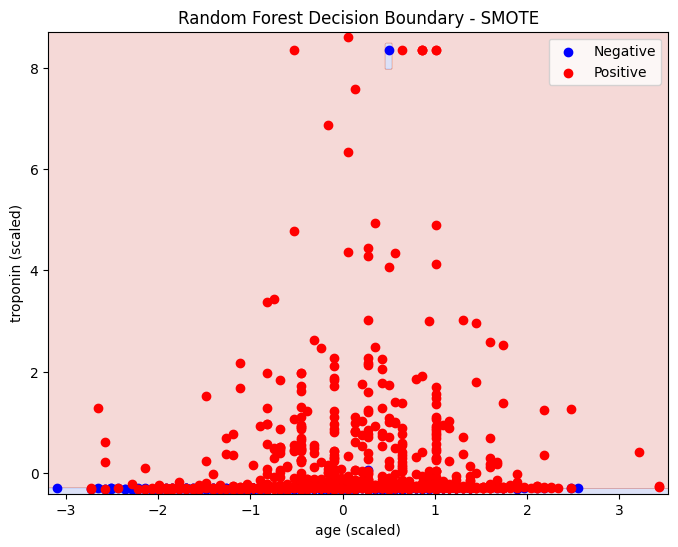


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64

--- Metrics: NearMiss ---
Test Loss (log loss): 0.11332028596897455
Accuracy: 0.9810606060606061
Precision: 0.9875776397515528
Recall: 0.9814814814814815
F1-score: 0.9845201238390093
Balanced Accuracy: 0.9809368191721133

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.99      0.98      0.98       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



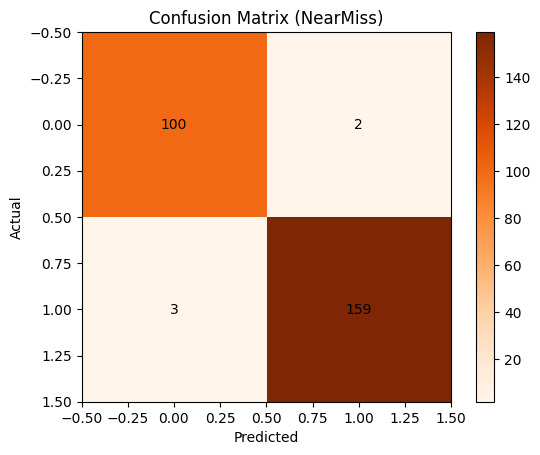

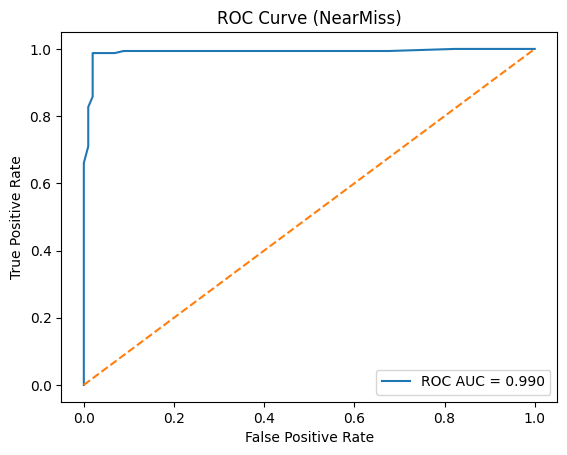

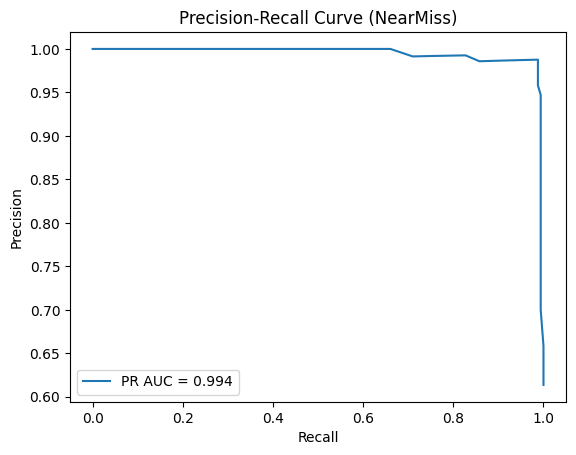

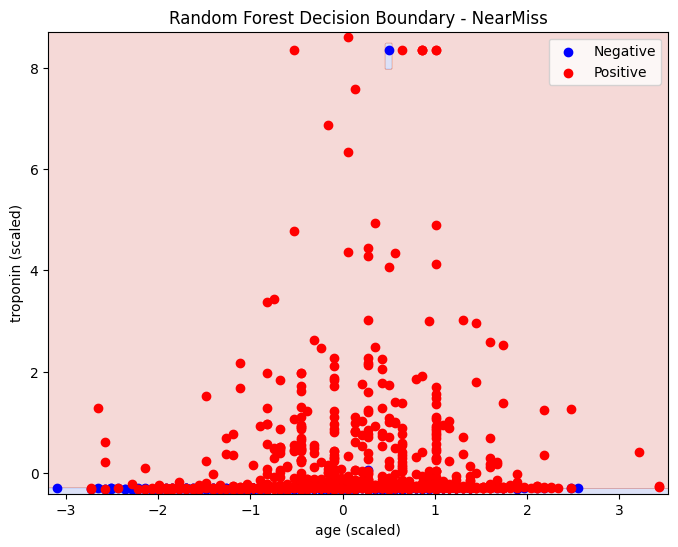


--- Summary Table: Random Forest Experiments ---


,Test Loss,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.092722,0.984848,0.987654,0.987654,0.987654,0.984023,0.993978,0.996204
SMOTE,0.086585,0.984848,0.987654,0.987654,0.987654,0.984023,0.993343,0.994001
NearMiss,0.113320,0.981061,0.987578,0.981481,0.984520,0.980937,0.990499,0.994079


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    log_loss
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- SCALE FEATURES ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- HELPER FUNCTION ----------------
def evaluate_rf(model, X_train, y_train, X_test, y_test, title=""):
    # Train
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]  # probability for positive class
    y_pred = model.predict(X_test)

    # Test loss
    test_loss = log_loss(y_test, y_prob)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Test Loss (log loss):", test_loss)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap='Oranges')
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    return {
        "Test Loss": test_loss,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- DECISION BOUNDARY FUNCTION ----------------
def plot_rf_decision_boundary(model, X_scaled, y, feature_indices=[0,7], title="Decision Boundary"):
    # Select two features
    X_plot = X_scaled[:, feature_indices]
    y_plot = y.values if isinstance(y, pd.Series) else y

    # Train Random Forest only on two features
    rf_vis = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_vis.fit(X_plot, y_plot)

    # Create mesh grid
    x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
    y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict for grid
    Z = rf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    # Points
    plt.scatter(X_plot[y_plot==0, 0], X_plot[y_plot==0, 1], color='blue', label='Negative')
    plt.scatter(X_plot[y_plot==1, 0], X_plot[y_plot==1, 1], color='red', label='Positive')

    plt.xlabel('age (scaled)')
    plt.ylabel('troponin (scaled)')
    plt.title(title)
    plt.legend()
    plt.show()

# ---------------- TRAIN/TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
rf_model_imbalanced = RandomForestClassifier(n_estimators=100, random_state=42)
metrics_imbalanced = evaluate_rf(rf_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")
plot_rf_decision_boundary(rf_model_imbalanced, X_scaled, y, title="Random Forest Decision Boundary - Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
metrics_smote = evaluate_rf(rf_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")
plot_rf_decision_boundary(rf_model_smote, X_scaled, y, title="Random Forest Decision Boundary - SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
rf_model_nm = RandomForestClassifier(n_estimators=100, random_state=42)
metrics_nm = evaluate_rf(rf_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")
plot_rf_decision_boundary(rf_model_nm, X_scaled, y, title="Random Forest Decision Boundary - NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: Random Forest Experiments ---")
summary_df


Adaboost

Experiment 1: Original Imbalanced Dataset
Train class distribution:
 class
1    648
0    407
Name: count, dtype: int64

--- Metrics: Imbalanced ---
Test Loss (log loss): 0.42674354877825554
Accuracy: 0.9848484848484849
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1-score: 0.9876543209876543
Balanced Accuracy: 0.9840232389251997

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



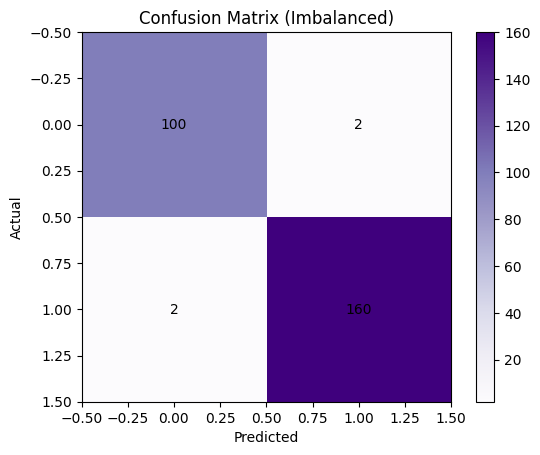

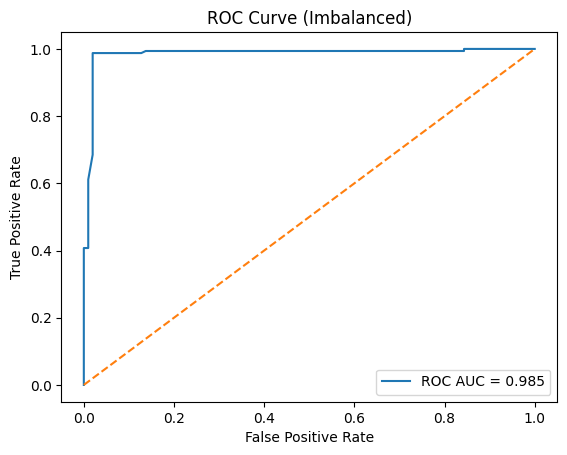

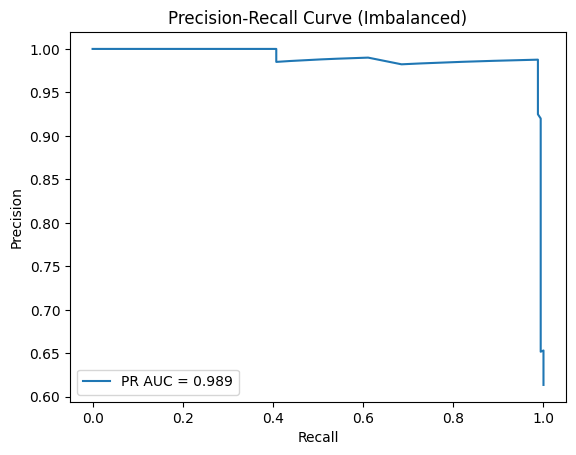

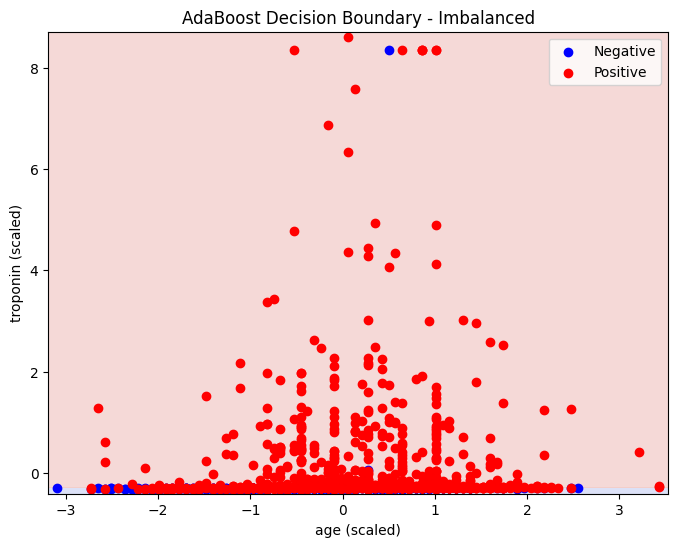


Experiment 2: SMOTE Oversampling
Train class distribution after SMOTE:
 class
1    648
0    648
Name: count, dtype: int64

--- Metrics: SMOTE ---
Test Loss (log loss): 0.42979757770978827
Accuracy: 0.9848484848484849
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1-score: 0.9876543209876543
Balanced Accuracy: 0.9840232389251997

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



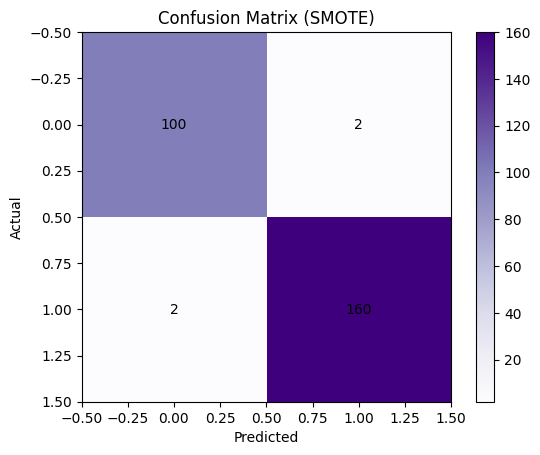

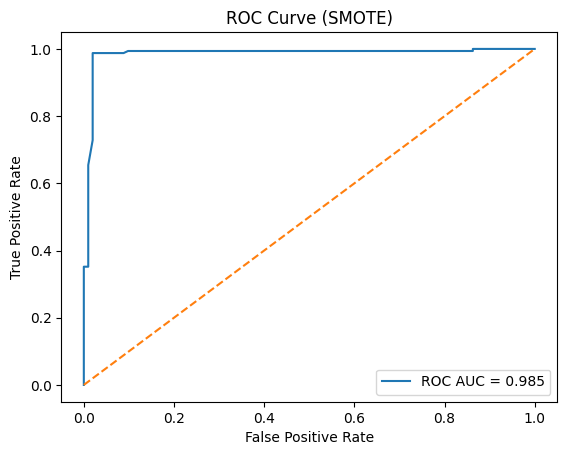

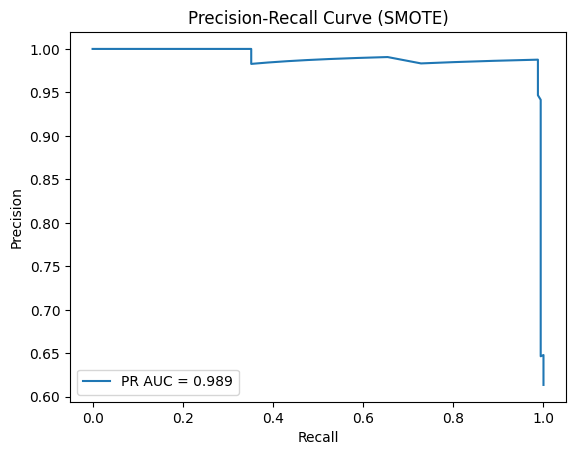

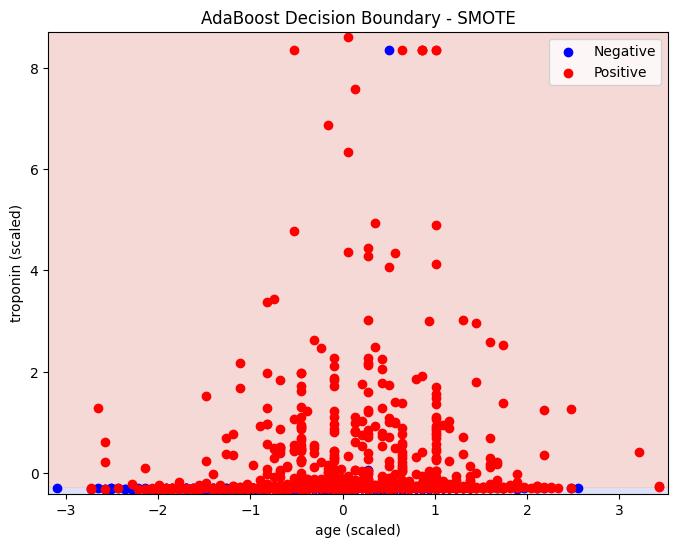


Experiment 3: NearMiss Undersampling
Train class distribution after NearMiss:
 class
0    407
1    407
Name: count, dtype: int64

--- Metrics: NearMiss ---
Test Loss (log loss): 0.4250700424901126
Accuracy: 0.9848484848484849
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1-score: 0.9876543209876543
Balanced Accuracy: 0.9840232389251997

Classification Report (support included):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.99      0.99      0.99       162

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



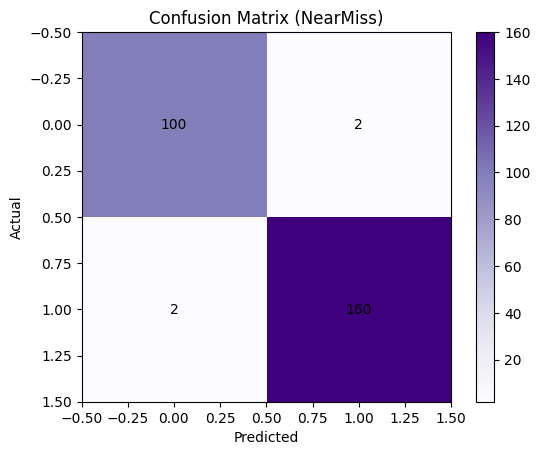

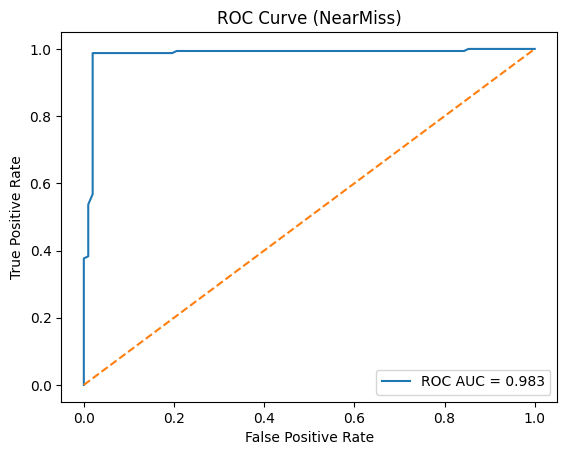

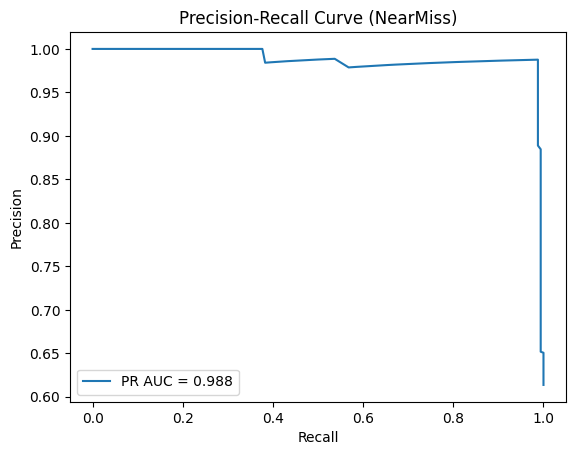

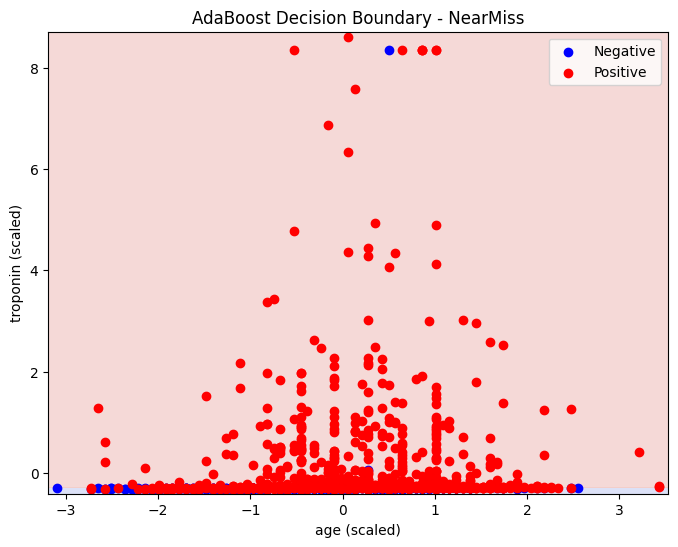


--- Summary Table: AdaBoost Experiments ---


,Test Loss,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,ROC AUC,PR AUC
Imbalanced,0.426744,0.984848,0.987654,0.987654,0.987654,0.984023,0.984961,0.989233
SMOTE,0.429798,0.984848,0.987654,0.987654,0.987654,0.984023,0.984961,0.988845
NearMiss,0.425070,0.984848,0.987654,0.987654,0.987654,0.984023,0.983297,0.987713


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    log_loss
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("heart_attack_normalized.csv")
X = df.drop(columns=['class'])
y = df['class']

# ---------------- SCALE FEATURES ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- HELPER FUNCTION ----------------
def evaluate_adaboost(model, X_train, y_train, X_test, y_test, title=""):
    # Train
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]  # probability for positive class
    y_pred = model.predict(X_test)

    # Test loss
    test_loss = log_loss(y_test, y_prob)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    print(f"\n--- Metrics: {title} ---")
    print("Test Loss (log loss):", test_loss)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Balanced Accuracy:", bal_acc)
    print("\nClassification Report (support included):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap='Purples')
    plt.title(f"Confusion Matrix ({title})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({title})")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({title})")
    plt.legend()
    plt.show()

    return {
        "Test Loss": test_loss,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Balanced Accuracy": bal_acc,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    }

# ---------------- DECISION BOUNDARY FUNCTION ----------------
def plot_adaboost_decision_boundary(model, X_scaled, y, feature_indices=[0,7], title="Decision Boundary"):
    # Select two features
    X_plot = X_scaled[:, feature_indices]
    y_plot = y.values if isinstance(y, pd.Series) else y

    # Train AdaBoost only on two features
    estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
    adb_vis = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
    adb_vis.fit(X_plot, y_plot)

    # Create mesh grid
    x_min, x_max = X_plot[:, 0].min() - 0.1, X_plot[:, 0].max() + 0.1
    y_min, y_max = X_plot[:, 1].min() - 0.1, X_plot[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict for grid
    Z = adb_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    # Points
    plt.scatter(X_plot[y_plot==0, 0], X_plot[y_plot==0, 1], color='blue', label='Negative')
    plt.scatter(X_plot[y_plot==1, 0], X_plot[y_plot==1, 1], color='red', label='Positive')

    plt.xlabel('age (scaled)')
    plt.ylabel('troponin (scaled)')
    plt.title(title)
    plt.legend()
    plt.show()

# ---------------- TRAIN/TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- EXPERIMENT 1: IMBALANCED ----------------
print("Experiment 1: Original Imbalanced Dataset")
print("Train class distribution:\n", y_train.value_counts())
adb_model_imbalanced = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50, random_state=42
)
metrics_imbalanced = evaluate_adaboost(adb_model_imbalanced, X_train, y_train, X_test, y_test, "Imbalanced")
plot_adaboost_decision_boundary(adb_model_imbalanced, X_scaled, y, title="AdaBoost Decision Boundary - Imbalanced")

# ---------------- EXPERIMENT 2: SMOTE ----------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nExperiment 2: SMOTE Oversampling")
print("Train class distribution after SMOTE:\n", y_train_sm.value_counts())
adb_model_smote = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50, random_state=42
)
metrics_smote = evaluate_adaboost(adb_model_smote, X_train_sm, y_train_sm, X_test, y_test, "SMOTE")
plot_adaboost_decision_boundary(adb_model_smote, X_scaled, y, title="AdaBoost Decision Boundary - SMOTE")

# ---------------- EXPERIMENT 3: NearMiss ----------------
nearmiss = NearMiss(version=1)
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)
print("\nExperiment 3: NearMiss Undersampling")
print("Train class distribution after NearMiss:\n", y_train_nm.value_counts())
adb_model_nm = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50, random_state=42
)
metrics_nm = evaluate_adaboost(adb_model_nm, X_train_nm, y_train_nm, X_test, y_test, "NearMiss")
plot_adaboost_decision_boundary(adb_model_nm, X_scaled, y, title="AdaBoost Decision Boundary - NearMiss")

# ---------------- SUMMARY TABLE ----------------
summary_df = pd.DataFrame([metrics_imbalanced, metrics_smote, metrics_nm],
                          index=["Imbalanced", "SMOTE", "NearMiss"])
print("\n--- Summary Table: AdaBoost Experiments ---")
summary_df
